# Solving Laplace's Equation for Potential Flow with Finite Differences 

## Laplace’s Equation in 1D, 2D, and 3D

We solve **Laplace’s equation**, the canonical form of steady, incompressible, irrotational flow:

$$
\nabla^2 \phi = 0
$$

Where $\phi$ is the potential function and $\vec{u} = \nabla \phi$ defines the velocity field.

---

###  Dimensional Forms

**1D:**
$$
\frac{\partial^2 \phi}{\partial x^2} = 0
$$

**2D:**
$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0
$$

**3D:**
$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} + \frac{\partial^2 \phi}{\partial z^2} = 0
$$

This PDE is **elliptic**, **time-independent**, and reflects incompressibility via $\nabla \cdot \vec{u} = 0$.

---

###  Finite Difference Discretizations

We discretize the second derivative in space using both **central** and **one-sided** (forward/backward) stencils:

---

####  Forward Difference (second-order accurate, one-sided):
$$
\frac{-\phi_{i+2} + 4\phi_{i+1} - 5\phi_i + 2\phi_{i-1}}{\Delta x^2}
$$

####  Backward Difference (second-order accurate, one-sided):
$$
\frac{-\phi_{i-2} + 4\phi_{i-1} - 5\phi_i + 2\phi_{i+1}}{\Delta x^2}
$$

####  Central Difference (second-order accurate, symmetric):
$$
\frac{\phi_{i+1} - 2\phi_i + \phi_{i-1}}{\Delta x^2}
$$

We will solve Laplace’s equation in **1D, 2D, and 3D**, comparing these discretization strategies — emphasizing stability, convergence, and accuracy.

---

### Boundary Conditions

To solve Laplace’s equation numerically, we apply **Dirichlet boundary conditions** — fixed values of the potential $\phi$ along the domain boundaries.

For all examples in this notebook:

- The domain is rectangular and discretized on a uniform grid.
- We fix the potential $\phi$ on all sides of the domain.
- Boundary values remain constant throughout the iterative solution.

#### Example (2D):
- Top boundary: $\phi = 1$
- Bottom, left, right boundaries: $\phi = 0$

These boundary conditions represent a canonical setup often used to demonstrate steady-state diffusion or electrostatics, where potential is imposed on a conductor’s surface.


In [3]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt

### Implementing Forward Difference for $\frac{\partial^2 \phi}{\partial x^2}$

We now implement the **second-order forward-biased approximation** of the second derivative using finite differences. This stencil is useful near domain boundaries where central differencing is not applicable.

---

#### 1D Forward Difference (2nd-order, one-sided):

Uses points: $\phi_{i-1}$, $\phi_i$, $\phi_{i+1}$, $\phi_{i+2}$

$$
\frac{\partial^2 \phi}{\partial x^2} \bigg|_i \approx \frac{-\phi_{i+2} + 4\phi_{i+1} - 5\phi_i + 2\phi_{i-1}}{\Delta x^2}
$$

---

#### 2D Forward Difference (apply in $x$ and $y$):

For the $x$-direction:

$$
\frac{\partial^2 \phi}{\partial x^2} \bigg|_{i,j} \approx \frac{-\phi_{i+2,j} + 4\phi_{i+1,j} - 5\phi_{i,j} + 2\phi_{i-1,j}}{\Delta x^2}
$$

For the $y$-direction:

$$
\frac{\partial^2 \phi}{\partial y^2} \bigg|_{i,j} \approx \frac{-\phi_{i,j+2} + 4\phi_{i,j+1} - 5\phi_{i,j} + 2\phi_{i,j-1}}{\Delta y^2}
$$

---

#### 3D Forward Difference (add $z$-direction):

Extend to 3D by adding:

$$
\frac{\partial^2 \phi}{\partial z^2} \bigg|_{i,j,k} \approx \frac{-\phi_{i,j,k+2} + 4\phi_{i,j,k+1} - 5\phi_{i,j,k} + 2\phi_{i,j,k-1}}{\Delta z^2}
$$

---

Note: While these stencils offer second-order accuracy near boundaries, they are **not symmetric** and may introduce directional bias or numerical diffusion. We include them for completeness and to compare against central differencing.


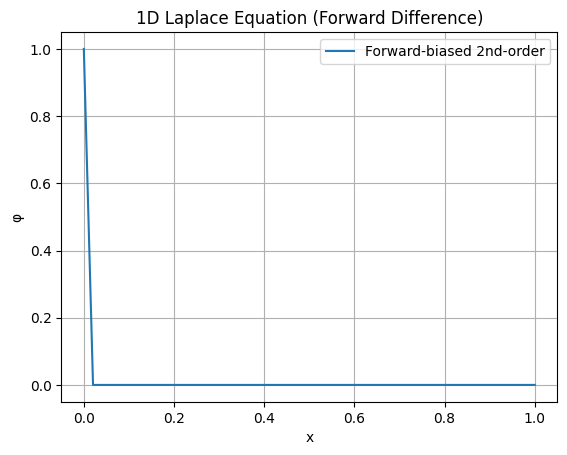

In [5]:
# Parameters
nx = 101                    # Number of Grid Points
l = 1.0                     # Length of Domain
dx = l / (nx - 1)           # Evenly-Spaced Domain Discretization Length(s)
x = np.linspace(0, l, nx)   # X-Domain Grid Points


phi = np.zeros(nx)          # Initialize Scalar Function to 0
phi[0] = 1.0                # Left Boundary
phi[-1] = 0.0               # Right Boundary


for it in range(nx):
    phi_old = phi.copy()
    for i in range(2, nx - 2):
        phi[i] = (-phi[i + 2] + 4 * phi[i + 1] + 2 * phi[i - 1]) / 5

    # implement convergence check (optional)

# Plot
plt.plot(x, phi, label='Forward-biased 2nd-order')
plt.title("1D Laplace Equation (Forward Difference)")
plt.xlabel("x")
plt.ylabel("φ")
plt.grid(True)
plt.legend()
plt.show()